<h1> <font color='#002B54'><center>AUDIO SENTIMENT ANALYSIS By Sonic SARK</center></font></h1>
<h3><center><font color='#391242'>To detect Emotion of the user from audio file</font></center></h3>


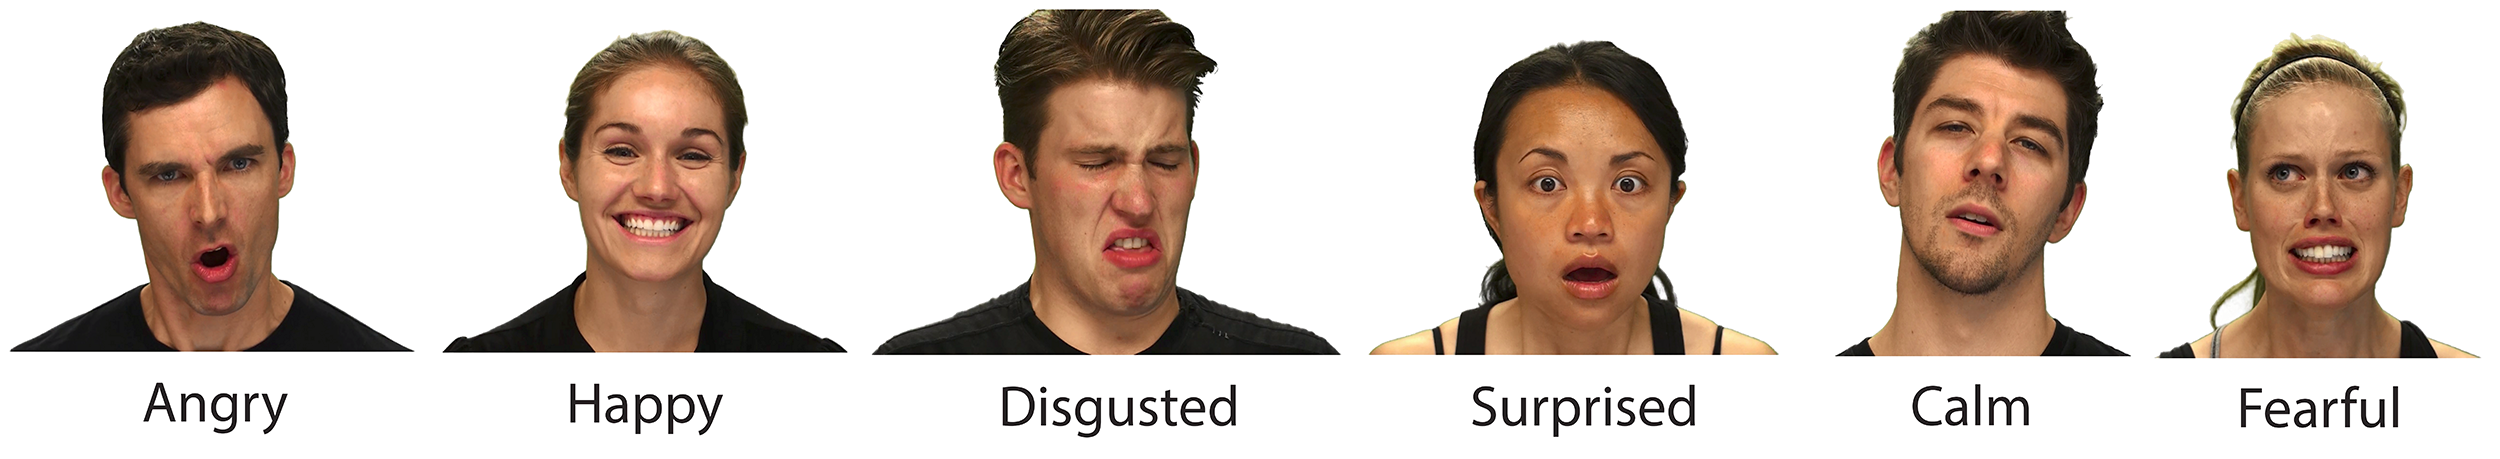

<h1> <font color='#002B54'>Importing necessary modules</font></h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
   
import librosa as lr

import librosa
import speech_recognition as sr

import IPython.display as ipd
import librosa.display

## <font color='#002B54'>1.Loading Dataset</font>

In [365]:
# loading audio files of 24 actors and their respective path from Ravdess Dataset with path
import os
os.listdir(path='Sonic_Sark/Dataset')

def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = 'Sonic_Sark/Dataset'
listOfFiles = getListOfFiles(dirName)
print("Total Number of Audio Files is ",len(listOfFiles))

Total Number of Audio Files is  2452


In [366]:
listOfFiles

['Sonic_Sark/Dataset/Song/Actor_22/03-02-05-01-01-02-22.wav',
 'Sonic_Sark/Dataset/Song/Actor_22/03-02-06-02-01-02-22.wav',
 'Sonic_Sark/Dataset/Song/Actor_22/03-02-03-02-02-02-22.wav',
 'Sonic_Sark/Dataset/Song/Actor_22/03-02-04-01-02-02-22.wav',
 'Sonic_Sark/Dataset/Song/Actor_22/03-02-05-01-02-01-22.wav',
 'Sonic_Sark/Dataset/Song/Actor_22/03-02-06-01-02-02-22.wav',
 'Sonic_Sark/Dataset/Song/Actor_22/03-02-05-02-02-01-22.wav',
 'Sonic_Sark/Dataset/Song/Actor_22/03-02-04-02-01-01-22.wav',
 'Sonic_Sark/Dataset/Song/Actor_22/03-02-03-01-02-01-22.wav',
 'Sonic_Sark/Dataset/Song/Actor_22/03-02-02-02-02-01-22.wav',
 'Sonic_Sark/Dataset/Song/Actor_22/03-02-04-01-01-02-22.wav',
 'Sonic_Sark/Dataset/Song/Actor_22/03-02-06-01-01-01-22.wav',
 'Sonic_Sark/Dataset/Song/Actor_22/03-02-03-01-01-01-22.wav',
 'Sonic_Sark/Dataset/Song/Actor_22/03-02-03-01-01-02-22.wav',
 'Sonic_Sark/Dataset/Song/Actor_22/03-02-01-01-02-01-22.wav',
 'Sonic_Sark/Dataset/Song/Actor_22/03-02-01-01-02-02-22.wav',
 'Sonic_

## <font color='#002B54'>2.Separating & Labelling Emotions from Dataset</font>

<font color='#002B54'> The filenames are formatted in such a way that third part (5th and 6th value) from the filename represents the emotion of the audio.

For example--> 
02-01-**06**-01-02-01-12.wav here 06 represents **fear** emotion. </font>


In [368]:
import pandas as pd
file_emotion = []
file_path = []

for i in listOfFiles:
        part = i.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(i)
        
# Storing 3rd part of every file into emotion_df dataframe 
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Concatenating file_emotion and file_path into Ravdess_df
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Labeling integers into their respective classes
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


In [369]:
emotion_df.head()

Emotions
0         5
1         6
2         3
3         4
4         5

In [380]:
Ravdess_df.head()

Emotions                                               Path
0    angry  Sonic_Sark/Dataset/Song/Actor_22/03-02-05-01-0...
1     fear  Sonic_Sark/Dataset/Song/Actor_22/03-02-06-02-0...
2    happy  Sonic_Sark/Dataset/Song/Actor_22/03-02-03-02-0...
3      sad  Sonic_Sark/Dataset/Song/Actor_22/03-02-04-01-0...
4    angry  Sonic_Sark/Dataset/Song/Actor_22/03-02-05-01-0...

In [381]:
Ravdess_df.shape

(2452, 2)

##  <font color='#002B54'>3.Basic Visualization</font>

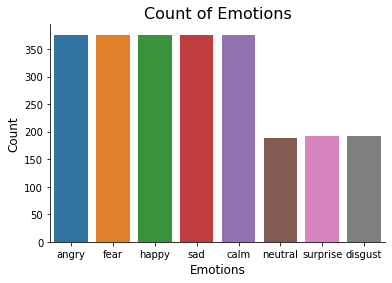

In [383]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('Count of Emotions', size=16)
sns.countplot(Ravdess_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

### <font color='#002B54'> Amplitude vs Time Graph </font>

The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.

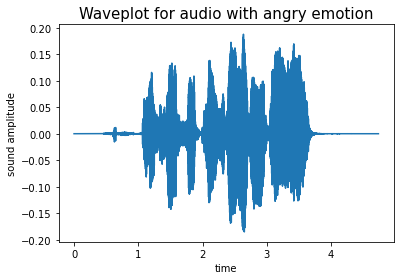

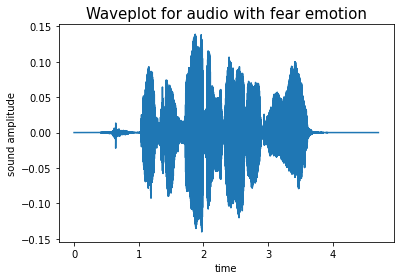

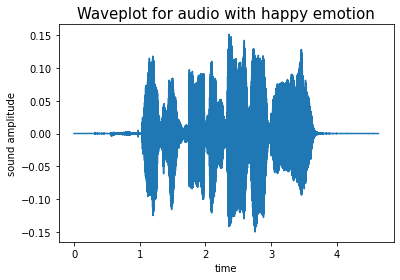

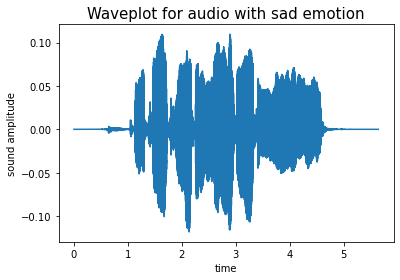

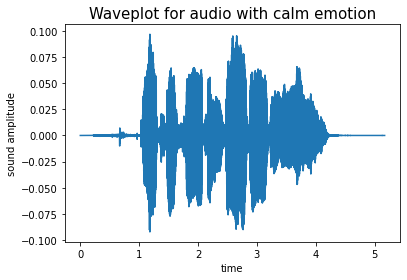

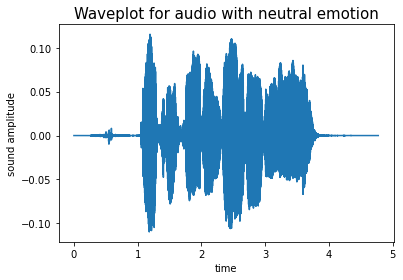

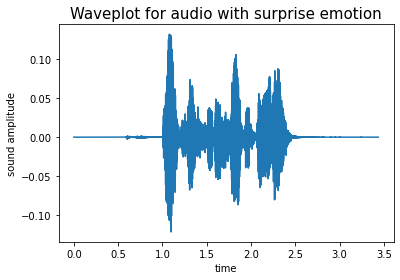

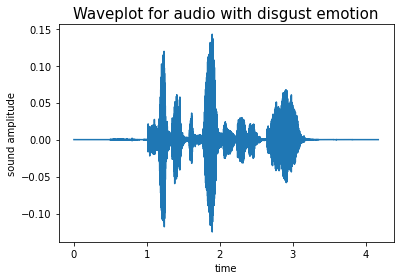

In [384]:
# Plotting amplitude vs time graph for each emotion
import librosa as lr
import numpy as np
for i in Ravdess_df['Emotions'].unique():
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==i])[1]
    audio,sfreq=lr.load(path)
    time=np.arange(0,len(audio))/sfreq
    fig,ax=plt.subplots()
    ax.plot(time,audio)
    ax.set(xlabel="time",ylabel="sound amplitude")
    plt.title('Waveplot for audio with {} emotion'.format(i), size=15)
    plt.show()

### <font color='#002B54'> Waveplots & Spectrogram </font>

This audio is for Emotion angry


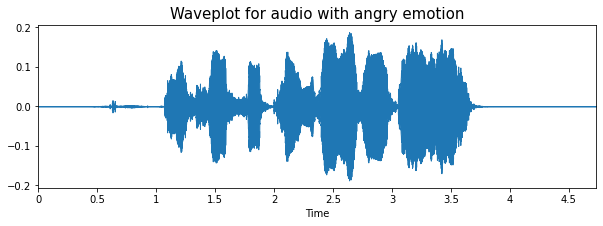

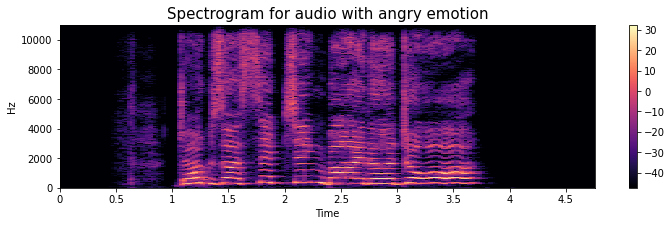

-------------------------------------------------------------
This audio is for Emotion fear


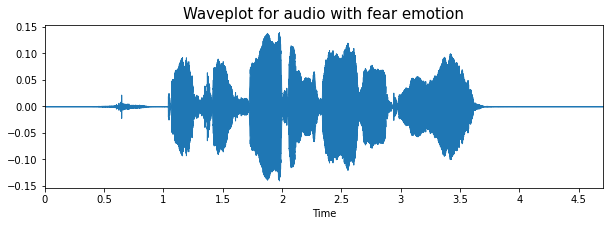

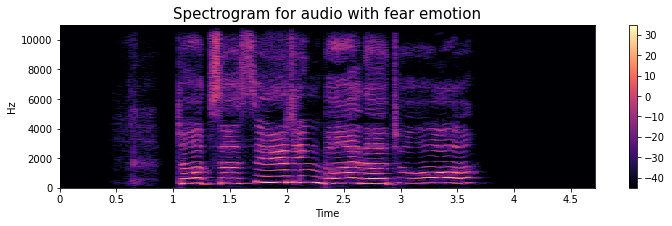

-------------------------------------------------------------
This audio is for Emotion happy


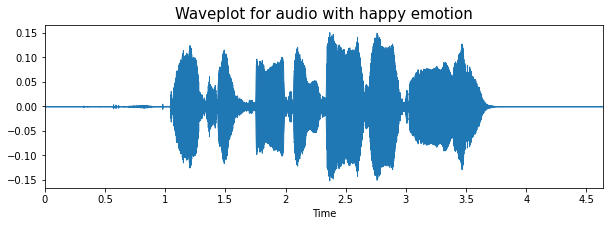

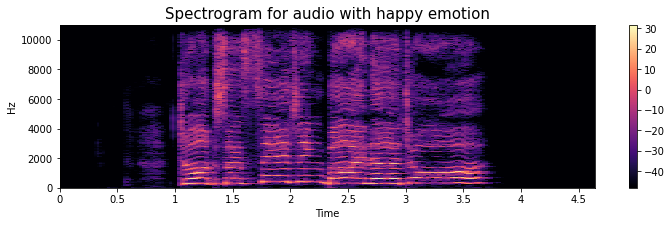

-------------------------------------------------------------
This audio is for Emotion sad


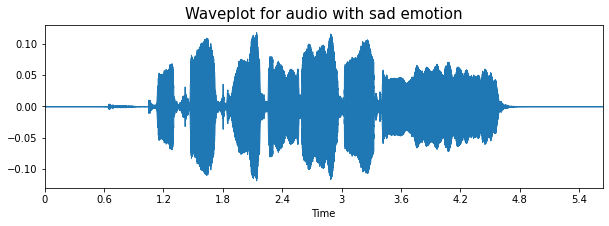

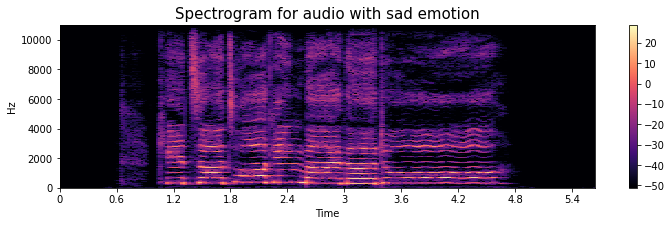

-------------------------------------------------------------
This audio is for Emotion calm


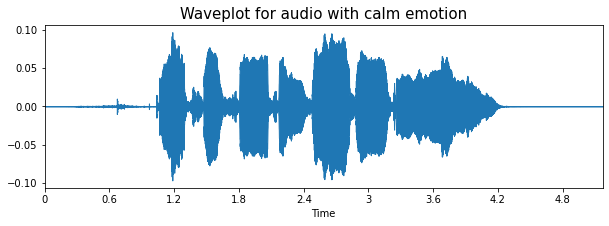

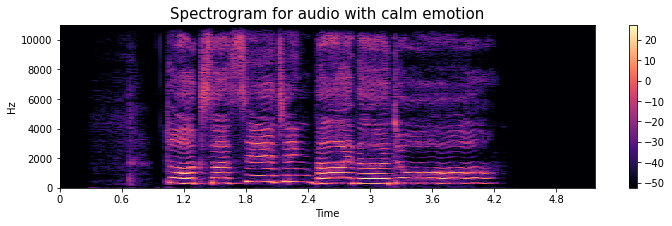

-------------------------------------------------------------
This audio is for Emotion neutral


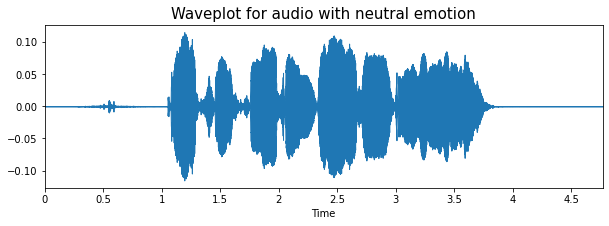

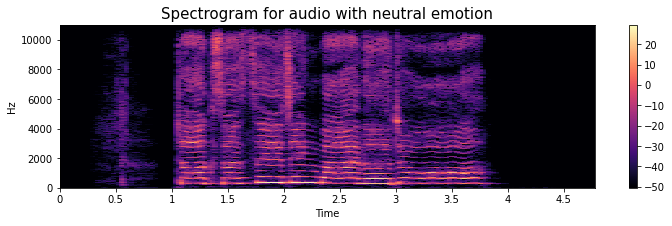

-------------------------------------------------------------
This audio is for Emotion surprise


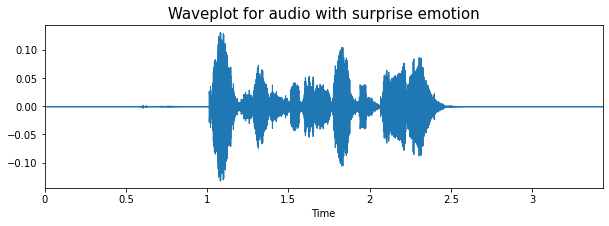

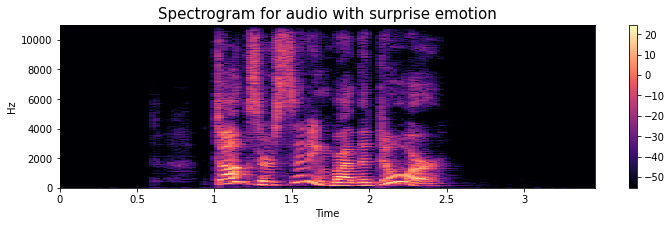

-------------------------------------------------------------
This audio is for Emotion disgust


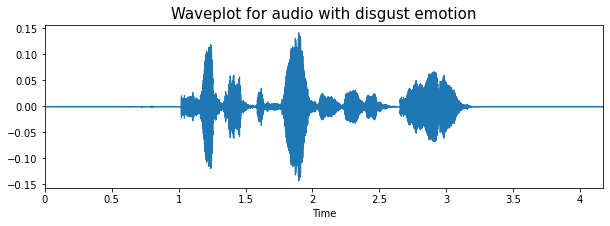

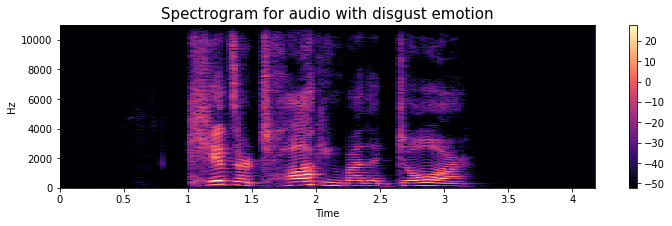

-------------------------------------------------------------


In [385]:
#ploating waveplot and spectogram for each emotion 
def get_audio(path,sr,e):
    print("This audio is for Emotion",e)
    ipd.display(ipd.Audio(path, rate=sr))

def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    lr.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = lr.stft(data)
    Xdb = lr.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()
    plt.show()
    print("-------------------------------------------------------------")
    
import IPython   
import IPython.display as ipd
import librosa.display
for i in Ravdess_df['Emotions'].unique():
    emotion = i
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
    data, sampling_rate = lr.load(path)
    
    get_audio(path,sampling_rate,emotion)
    create_waveplot(data, sampling_rate, emotion)
    create_spectrogram(data, sampling_rate, emotion)

## <font color='#002B54'> 4.Feature Extraction </font>

In [2]:
#Feature Extraction of Audio Files Function 
#Extract features (mfcc, chroma, mel) from a sound file

x=[]
y=[]
def extract_feature(data,sampling_rate):
    result=np.array([])
    #Path=i
    #result=np.hstack((result, Path))
    
    stft = np.abs(librosa.stft(data))
    chromagram = np.mean(librosa.feature.chroma_stft(S=stft, sr=sampling_rate).T, axis=0)
    result=np.hstack((result, chromagram))
   
     
        
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)
    result=np.hstack((result, mfcc))
    

    mel=np.mean(librosa.feature.melspectrogram(data, sr=sampling_rate).T,axis=0)
    result=np.hstack((result, mel))
    

    return result


In [21]:
for i in range(0,len(Ravdess_df),1):
    data, sampling_rate = librosa.load(Ravdess_df.Path[i])
    feature=extract_feature(data,sampling_rate)
    emotions=Ravdess_df.Emotions[i]
    x.append(feature)
    y.append(emotions)


In [22]:
# Convering list of all extracted feature(x)and emotions(y) into dataframe (features & emotions)  
features=pd.DataFrame(x)
emotions=pd.DataFrame(y)

In [23]:
#Creating dataframe of all extracted features and our target variable
final_dataframe = pd.concat([emotions,features], axis=1)

In [24]:
# Storing final_dataframe into final_dataframe.csv for further computation
final_dataframe.to_csv('feature_extract.csv', index=False)

## <font color='#002B54'> 5.EDA (Exploratory Data Analysis) </font>

### <font color='#002B54'> Variable identification & Data Types </font>

In [386]:
df.dtypes

0       object
0.1    float64
1      float64
2      float64
3      float64
        ...   
175    float64
176    float64
177    float64
178    float64
179    float64
Length: 181, dtype: object

In [387]:
df['0'].unique(), df['0'].nunique()

(array(['angry', 'fear', 'happy', 'sad', 'calm', 'neutral', 'surprise',
        'disgust'], dtype=object),
 8)

### <font color='#002B54'> Analyzing the basic metrics </font>

In [388]:
df.shape

(2457, 181)

In [389]:
df.describe()

0.1            1            2            3            4  \
count  2457.000000  2457.000000  2457.000000  2457.000000  2457.000000   
mean      0.619268     0.595147     0.587892     0.610196     0.628515   
std       0.087860     0.109573     0.120182     0.111091     0.086690   
min       0.306251     0.223043     0.215276     0.253819     0.362172   
25%       0.564828     0.518404     0.499749     0.528754     0.569516   
50%       0.627198     0.597895     0.590556     0.614679     0.640792   
75%       0.682820     0.678445     0.682986     0.697490     0.692547   
max       0.836730     0.860695     0.859838     0.866144     0.845397   

                 5            6            7            8            9  ...  \
count  2457.000000  2457.000000  2457.000000  2457.000000  2457.000000  ...   
mean      0.658210     0.615478     0.601259     0.617101     0.616681  ...   
std       0.085072     0.077030     0.102370     0.098979     0.094794  ...   
min       0.364283     0.284953     0.241488     0.255482     0.306462  ...   
25%       0.613475     0.564903     0.531092     0.549741     0.550432  ...   
50%       0.670442     0.624019     0.605853     0.622478     0.622195  ...   
75%       0.719197     0.671030     0.681293     0.695971     0.692210  ...   
max       0.846784     0.827082     0.840626     0.848023     0.836951  ...   

                170           171           172           173           174  \
count  2.457000e+03  2.457000e+03  2.457000e+03  2.457000e+03  2.457000e+03   
mean   8.211475e-04  8.305904e-04  8.585189e-04  8.800606e-04  9.299302e-04   
std    2.079504e-03  2.081272e-03  2.196977e-03  2.378672e-03  2.632931e-03   
min    7.245407e-08  7.865874e-08  1.285709e-07  1.107121e-07  1.180011e-07   
25%    3.206290e-05  3.399967e-05  3.666270e-05  3.891865e-05  3.960883e-05   
50%    1.664589e-04  1.753192e-04  1.802136e-04  1.847919e-04  1.831946e-04   
75%    6.814696e-04  7.025040e-04  7.571408e-04  7.437408e-04  7.786879e-04   
max    2.890956e-02  3.098581e-02  4.241800e-02  5.608381e-02  6.935069e-02   

                175           176           177           178           179  
count  2.457000e+03  2.457000e+03  2.457000e+03  2.457000e+03  2.457000e+03  
mean   9.673958e-04  9.484189e-04  7.086208e-04  2.442459e-04  1.897455e-05  
std    2.677042e-03  2.480617e-03  1.761247e-03  6.226333e-04  4.839049e-05  
min    2.688337e-07  2.329146e-07  1.385161e-07  5.083410e-08  2.977982e-09  
25%    4.093328e-05  3.927757e-05  3.045878e-05  9.990794e-06  7.669449e-07  
50%    1.806462e-04  1.757598e-04  1.359312e-04  4.711377e-05  3.576918e-06  
75%    7.740930e-04  7.535441e-04  5.628666e-04  1.864208e-04  1.490735e-05  
max    6.216547e-02  4.367649e-02  2.497048e-02  8.415771e-03  7.418778e-04  

[8 rows x 180 columns]

In [391]:
df.groupby(['0']).mean()

0.1         1         2         3         4         5  \
0                                                                      
angry     0.632198  0.613483  0.605374  0.633062  0.645793  0.669335   
calm      0.586261  0.550211  0.542192  0.568612  0.614854  0.660049   
disgust   0.657005  0.663057  0.664547  0.670696  0.646845  0.637287   
fear      0.611397  0.586401  0.577097  0.603294  0.623743  0.653656   
happy     0.617808  0.589471  0.572349  0.592495  0.623147  0.662159   
neutral   0.619618  0.581546  0.584361  0.598253  0.624961  0.679718   
sad       0.603875  0.569016  0.560053  0.588850  0.611887  0.655660   
surprise  0.668924  0.672077  0.676144  0.688038  0.658966  0.638767   

                 6         7         8         9  ...       170       171  \
0                                                 ...                       
angry     0.633271  0.614646  0.631885  0.623894  ...  0.002468  0.002485   
calm      0.585901  0.553886  0.574487  0.598631  ...  0.000120  0.000119   
disgust   0.638498  0.654791  0.665928  0.664559  ...  0.000654  0.000635   
fear      0.624155  0.613547  0.631652  0.618940  ...  0.001174  0.001210   
happy     0.607350  0.578953  0.596690  0.621017  ...  0.000616  0.000602   
neutral   0.615803  0.604157  0.587012  0.572891  ...  0.000109  0.000109   
sad       0.603429  0.588410  0.614805  0.591562  ...  0.000213  0.000219   
surprise  0.637618  0.656205  0.668092  0.669198  ...  0.000720  0.000772   

               172       173       174       175       176       177  \
0                                                                      
angry     0.002612  0.002761  0.002966  0.003040  0.002955  0.002138   
calm      0.000131  0.000142  0.000134  0.000133  0.000139  0.000110   
disgust   0.000626  0.000615  0.000602  0.000549  0.000503  0.000424   
fear      0.001251  0.001255  0.001320  0.001410  0.001351  0.001021   
happy     0.000613  0.000588  0.000631  0.000709  0.000755  0.000575   
neutral   0.000114  0.000112  0.000124  0.000131  0.000134  0.000101   
sad       0.000226  0.000246  0.000244  0.000262  0.000255  0.000194   
surprise  0.000747  0.000722  0.000764  0.000779  0.000775  0.000606   

               178       179  
0                             
angry     0.000736  0.000056  
calm      0.000038  0.000003  
disgust   0.000156  0.000012  
fear      0.000357  0.000028  
happy     0.000187  0.000014  
neutral   0.000035  0.000003  
sad       0.000067  0.000006  
surprise  0.000212  0.000018  

[8 rows x 180 columns]

### <font color='#002B54'> Non-Graphical Univariate Analysis </font>

In [392]:
df.apply(lambda x: sum(x.isnull()),axis=0)

0      0
0.1    0
1      0
2      0
3      0
      ..
175    0
176    0
177    0
178    0
179    0
Length: 181, dtype: int64

In [393]:
df.isnull().values.any()

False

## <font color='#002B54'> Graphical Representation Of features </font>

### <font color='#002B54'> 1. Chroma</font>

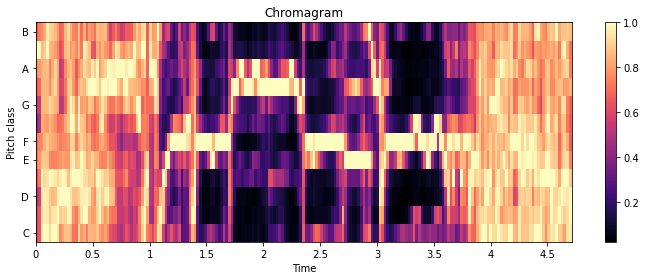

In [378]:
x,sr=librosa.load(Ravdess_df.Path[0])
S = np.abs(librosa.stft(x))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

### <font color='#002B54'>2. MFCC </font>

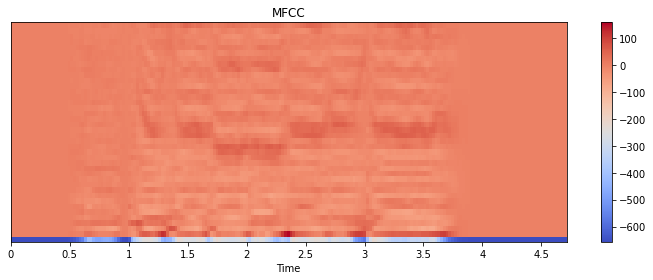

In [377]:
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

###   <font color='#002B54'> 3. Mel Spectogram </font>

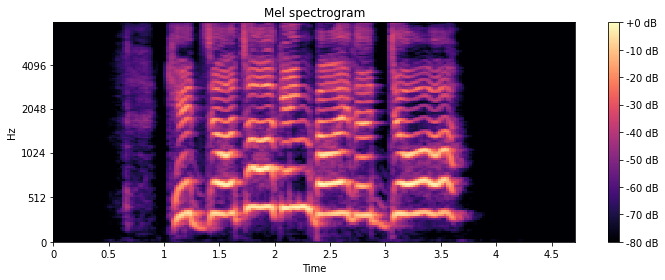

In [375]:
S = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

## <font color='#002B54'> 6.Data Pre-processing </font>

In [2]:
df=pd.read_csv("feature_extract.csv")

In [3]:
df.head()

0       0.1         1         2         3         4         5  \
0  angry  0.557858  0.510371  0.499992  0.566651  0.659806  0.735048   
1   fear  0.555770  0.517393  0.450806  0.516902  0.577471  0.686805   
2  happy  0.534163  0.490449  0.462375  0.495923  0.619669  0.721012   
3    sad  0.523077  0.449336  0.433862  0.465247  0.607185  0.747288   
4  angry  0.565606  0.505772  0.486172  0.528724  0.634803  0.727299   

          6         7         8  ...       170       171       172       173  \
0  0.573896  0.510367  0.625723  ...  0.001442  0.001676  0.002013  0.002175   
1  0.652652  0.493416  0.570823  ...  0.000896  0.000851  0.001065  0.001147   
2  0.544288  0.466010  0.509737  ...  0.001551  0.001079  0.001027  0.001256   
3  0.553110  0.507645  0.560223  ...  0.000473  0.000492  0.000578  0.000771   
4  0.618862  0.542625  0.583659  ...  0.001647  0.001722  0.001853  0.001527   

        174       175       176       177       178       179  
0  0.002581  0.002949  0.002632  0.001687  0.000461  0.000032  
1  0.000868  0.000816  0.000893  0.000724  0.000202  0.000017  
2  0.002046  0.002506  0.002531  0.001725  0.000528  0.000040  
3  0.000773  0.000665  0.000598  0.000325  0.000121  0.000010  
4  0.001952  0.002114  0.002313  0.001357  0.000389  0.000032  

[5 rows x 181 columns]

### <font color='#002B54'> Seperating target variable and feature variable </font>

In [4]:
X = df.iloc[: ,1:].values
y=df["0"].values

### <font color='#002B54'> Splitting X and y into train and test set </font>

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.20)# shuffle=True

In [7]:
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [6]:
y

array(['angry', 'fear', 'happy', ..., 'angry', 'disgust', 'happy'],
      dtype=object)

# <font color='#002B54'> 7. Model Building </font>

## <font color='#002B54'> Multi Layer Perceptron Classifier (MLP) </font>

In [12]:
# Initializing the Multi Layer Perceptron Classifier
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(alpha=0.01, batch_size=16, epsilon=1e-08, hidden_layer_sizes=(1000), learning_rate='adaptive', max_iter=500, activation='relu')

In [13]:
# Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=16, hidden_layer_sizes=1000,
              learning_rate='adaptive', max_iter=500)

In [14]:
# Predict for the test set
y_pred=model.predict(x_test)

In [15]:
# Calculate the accuracy of our model
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 72.56%


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       0.88      0.77      0.82        73
        calm       0.82      0.83      0.82        75
     disgust       0.64      0.66      0.65        44
        fear       0.72      0.81      0.76        84
       happy       0.65      0.69      0.67        65
     neutral       0.84      0.68      0.75        38
         sad       0.63      0.69      0.66        72
    surprise       0.64      0.51      0.57        41

    accuracy                           0.73       492
   macro avg       0.73      0.71      0.71       492
weighted avg       0.73      0.73      0.73       492



In [17]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
print (matrix)

[[56  0  5  4  6  0  0  2]
 [ 0 62  1  1  3  1  7  0]
 [ 5  1 29  1  1  1  5  1]
 [ 2  1  0 68  3  0  8  2]
 [ 0  4  2  9 45  1  0  4]
 [ 0  4  1  1  1 26  4  1]
 [ 0  3  3 10  2  2 50  2]
 [ 1  1  4  1  8  0  5 21]]


In [18]:
result = pd.DataFrame({'predicted_values': y_pred})
result["Actual_Values"]=pd.DataFrame(y_test)
result[:10]

predicted_values Actual_Values
0              sad          fear
1             fear          fear
2              sad          fear
3             calm          calm
4          disgust       disgust
5            angry         angry
6          neutral       neutral
7              sad          fear
8             calm          calm
9             fear           sad

In [19]:
# SAVING THE MODEL
# Saving the Model to file in the current working directory

import pickle
Pkl_Filename = "new_mlp_74.pkl"
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

### <font color='#002B54'> On Microphone data </font>

In [31]:
import librosa
import speech_recognition as sr

# obtain audio from the microphone
r = sr.Recognizer()
with sr.Microphone() as source:
    print("Hiii SARK's Say something!")
    audio = r.listen(source,phrase_time_limit=4)
    
# write audio to a WAV file
with open("output1.wav", "wb") as f:
    f.write(audio.get_wav_data())

Hiii SARK's Say something!


In [32]:
#Audio to text

txt=sr.AudioFile("output1.wav")

with txt as source:
    audio = r.record(source)
try:
    s = r.recognize_google(audio)
    print("You Said  : "+s)
except Exception as e:
    print("Exception: "+str(e))

ipd.display(ipd.Audio('output1.wav'))

You Said  : hey where are you


In [33]:
x=[]

#for i in range (0,20,1):
data, sampling_rate = librosa.load('output1.wav')
feature=extract_feature(data,sampling_rate)
x.append(feature)
print(data,"  ",sampling_rate)

[ 0.02057272  0.02708783  0.01956392 ...  0.00390124  0.00191083
 -0.00217544]    22050


In [34]:
import pickle
Pkl_Filename = "new_mlp_74.pkl"
# Loading the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    model= pickle.load(file)

model

MLPClassifier(alpha=0.01, batch_size=16, hidden_layer_sizes=1000,
              learning_rate='adaptive', max_iter=500)

In [35]:
model.predict(x)

array(['fear'], dtype='<U8')

# <font color='#002B54'> Sequential </font>

### <font color='#002B54'> Separating target and feature variables </font>

In [339]:
X = df.iloc[: ,1:].values
Y = df['0'].values

In [340]:
X

array([[5.57857931e-01, 5.10370612e-01, 4.99992192e-01, ...,
        1.68725080e-03, 4.60606330e-04, 3.20498912e-05],
       [5.55770159e-01, 5.17392695e-01, 4.50806379e-01, ...,
        7.23798235e-04, 2.02164258e-04, 1.67995859e-05],
       [5.34163356e-01, 4.90448803e-01, 4.62375343e-01, ...,
        1.72470312e-03, 5.28420904e-04, 3.95803218e-05],
       ...,
       [6.89456224e-01, 6.85156345e-01, 6.71890020e-01, ...,
        3.69323534e-03, 1.27884513e-03, 9.32679031e-05],
       [6.07618868e-01, 6.77095234e-01, 7.40863502e-01, ...,
        2.86406721e-04, 1.11566616e-04, 7.15969281e-06],
       [5.87467313e-01, 5.72949111e-01, 6.57651961e-01, ...,
        4.14375030e-03, 1.45018275e-03, 8.82740060e-05]])

### <font color='#002B54'> One Hot Encoding our Target variable </font>

In [341]:
# As this is a multiclass classification problem, we're onehotencoding our Y
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

### <font color='#002B54'> Splitting X and y into train and test set </font>

In [351]:
# Splitting data in Train-Test sets

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=9, test_size=0.10)#42
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2211, 180), (2211, 8), (246, 180), (246, 8))

### <font color='#002B54'> Scaling Data </font>

In [352]:
# Scaling our data with sklearn's Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2211, 180), (2211, 8), (246, 180), (246, 8))

### <font color='#002B54'> Making data compatible for Neural Networks </font>

In [353]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [354]:
x_train.shape, x_test.shape

((2211, 180, 1), (246, 180, 1))

### <font color='#002B54'> Importing necessary modules </font>

In [355]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop


### <font color='#002B54'> Model Definition </font>

In [356]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',input_shape=(180,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(64, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_38 (Conv1D)           (None, 180, 256)          1536      
_________________________________________________________________
activation_48 (Activation)   (None, 180, 256)          0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 180, 256)          0         
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 45, 256)           0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 45, 128)           163968    
_________________________________________________________________
activation_49 (Activation)   (None, 45, 128)           0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 45, 128)         

### <font color='#002B54'> Model compiling </font>

In [357]:
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [358]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

### <font color='#002B54'> Model fitting </font>

In [359]:
cnnhistory=model.fit(x_train, y_train, batch_size=16, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
139/139 [==============================] - 4s 22ms/step - loss: 1.9697 - accuracy: 0.2273 - val_loss: 1.8418 - val_accuracy: 0.3659
Epoch 2/200
139/139 [==============================] - 3s 20ms/step - loss: 1.8379 - accuracy: 0.3079 - val_loss: 1.7768 - val_accuracy: 0.3902
Epoch 3/200
139/139 [==============================] - 3s 20ms/step - loss: 1.8089 - accuracy: 0.3092 - val_loss: 1.7199 - val_accuracy: 0.3780
Epoch 4/200
139/139 [==============================] - 3s 20ms/step - loss: 1.7229 - accuracy: 0.3349 - val_loss: 1.6847 - val_accuracy: 0.3821
Epoch 5/200
139/139 [==============================] - 3s 21ms/step - loss: 1.6947 - accuracy: 0.3481 - val_loss: 1.6514 - val_accuracy: 0.3577
Epoch 6/200
139/139 [==============================] - 3s 20ms/step - loss: 1.6402 - accuracy: 0.3654 - val_loss: 1.6078 - val_accuracy: 0.3780
Epoch 7/200
139/139 [==============================] - 3s 22ms/step - loss: 1.6070 - accuracy: 0.3852 - val_loss: 1.5760 - val_accuracy:

139/139 [==============================] - 3s 20ms/step - loss: 0.5918 - accuracy: 0.8048 - val_loss: 0.7979 - val_accuracy: 0.7236
Epoch 114/200
139/139 [==============================] - 3s 20ms/step - loss: 0.6134 - accuracy: 0.7874 - val_loss: 0.8242 - val_accuracy: 0.7033
Epoch 115/200
139/139 [==============================] - 3s 20ms/step - loss: 0.6079 - accuracy: 0.7903 - val_loss: 0.8151 - val_accuracy: 0.6911
Epoch 116/200
139/139 [==============================] - 3s 19ms/step - loss: 0.6021 - accuracy: 0.7857 - val_loss: 0.8116 - val_accuracy: 0.6951
Epoch 117/200
139/139 [==============================] - 3s 20ms/step - loss: 0.5883 - accuracy: 0.8164 - val_loss: 0.8194 - val_accuracy: 0.6911
Epoch 118/200
139/139 [==============================] - 3s 20ms/step - loss: 0.6361 - accuracy: 0.7787 - val_loss: 0.8034 - val_accuracy: 0.6992
Epoch 119/200
139/139 [==============================] - 3s 21ms/step - loss: 0.5773 - accuracy: 0.7919 - val_loss: 0.7845 - val_accuracy:

### <font color='#002B54'> Model analysis </font>

8/8 [==============================] - 0s 7ms/step - loss: 0.7234 - accuracy: 0.7317
Accuracy of our model on test data :  73.17073345184326 %


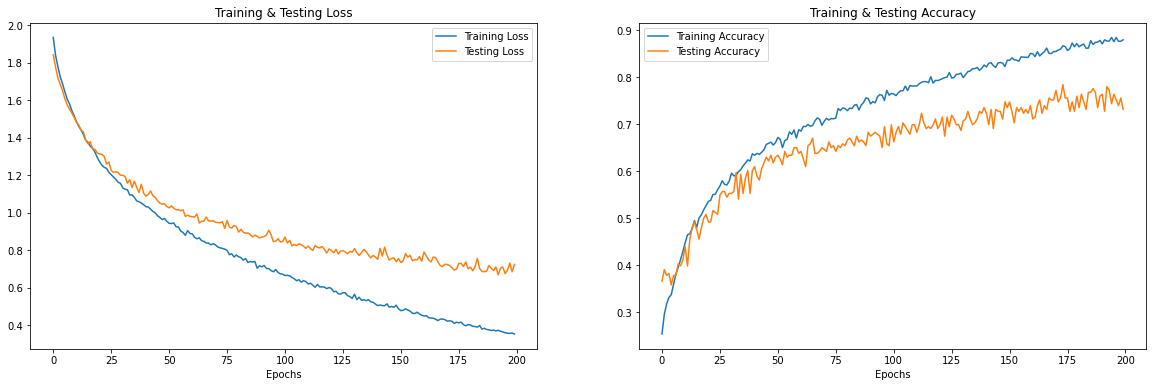

In [360]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = cnnhistory.history['accuracy']
train_loss = cnnhistory.history['loss']
test_acc = cnnhistory.history['val_accuracy']
test_loss = cnnhistory.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


### <font color='#002B54'> Saving the Model </font>

In [396]:
model_name = 'Final_Emotion_Detection_by_Sequential.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/rahul/Desktop/SONIC_SARKS/saved_models/Final_Emotion_Detection_by_Sequential.h5 


In [398]:
import json
model_json = model.to_json()
with open("Final_Emotion_Detection_by_Sequential.json", "w") as json_file:
    json_file.write(model_json)

### <font color='#002B54'> Loading the model </font>

In [400]:
# Loading the model
# Loading json and creating model

from keras.models import model_from_json
json_file = open('Final_Emotion_Detection_by_Sequential.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Final_Emotion_Detection_by_Sequential.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 73.17%


### <font color='#002B54'> Applying model on test data </font>

In [436]:
preds = loaded_model.predict(x_test, batch_size=10,verbose=1)

25/25 [==============================] - 0s 3ms/step


In [437]:
predict=preds.argmax(axis=1)
actual=y_test.argmax(axis=1)


In [438]:
predict = pd.DataFrame(predict, columns=['Predicted_y'])
actual = pd.DataFrame(actual, columns=['Actual'])

In [439]:
result=pd.concat([predict,actual],axis=1)

In [440]:
result['Predicted_y']=result['Predicted_y'].map({0:'neutral', 1:'calm', 2:'happy', 3:'sad', 4:'angry', 5:'fear', 6:'disgust', 7:'surprise'})
result['Actual']=result['Actual'].map({0:'neutral', 1:'calm', 2:'happy', 3:'sad', 4:'angry', 5:'fear', 6:'disgust', 7:'surprise'})


In [446]:
result.head(6)

Predicted_y Actual
0        fear   fear
1        calm   calm
2         sad    sad
3       angry  angry
4       angry  angry
5         sad   calm

In [452]:
#by microphone 
op=np.expand_dims(x,-1)
pred=loaded_model.predict(op)
